In [5]:
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm
from snownlp import SnowNLP
import jiagu
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dfc = pd.read_csv('..\data\data_C.csv',index_col = 0,dtype = {'simple review':str,'review':str,})

In [3]:
sum(pd.notnull(dfc['review'])) # 3062 lines with review
dfc_review = dfc[pd.notnull(dfc['review'])] 
dfc_review = dfc_review.reset_index(drop = True)
dfc_review

3062

,car type,purch time,purch place,purch price,avg rate,publish time,score,purch purp,simple review,review,cum mileage
0,2019款奔驰C级C 300 L 运动版,2019-01-01,上海星瀚汽车维修服务有限公司（奔驰） [上海市],35万 (厂商指导价 47.48万),15L/100km,2019-03-07,"{'外观': '5', '内饰': '5', '空间': '5', '舒适': '5', '...",['上班'],外观惊艳，内饰完美，30万级别绝对无敌手，音响比较hao啊，后备箱有点小了，我自己的话是够用...,[最满意]\n绚丽的立标外观，迷离的多条式轮圈，车身流畅的线条，光看前脸，回头率比较高，从侧...,NaN
1,2019款奔驰C级C 300 L 运动版,2019-01-01,烟台之星汽车服务有限公司 [山东省],49万 (厂商指导价 47.48万),9L/100km,2019-03-07,"{'外观': '5', '内饰': '5', '空间': '5', '舒适': '5', '...",['上班'],绚丽的立标外观，迷离的多条式轮圈，车身流畅的线条，光看前脸，回头率比较高，从侧面看就有种蓄势...,[最满意]\n外观惊艳，内饰完美，超乎我的预期\n[不满意]\n后备箱有点小了，我自己的话是...,NaN
2,2018款奔驰C级C 200 L,2018-11-01,北京之星汽车服务有限公司 [北京市],30万 (厂商指导价 35.08万),9L/100km,2019-02-14,"{'外观': '5', '内饰': '4', '空间': '5', '舒适': '5', '...",['购物'],不管时外型还是配置和是操纵感，都比较满足我的要求，我想要的它都给了我，所以我选择,[最满意]\n最喜欢的还是奔驰的大标，就是那么的大气，透着一股高端范。说白了就是儿时梦想。车...,NaN
3,2018款奔驰C级C 200 L 运动型 成就特别版,2018-07-01,南京江北之星汽车服务有限公司 [江苏省],32.38万 (厂商指导价 35.38万),10L/100km,2018-12-10,"{'外观': '5', '内饰': '5', '空间': '4', '舒适': '4', '...","['上班', '购物']",这车可没有性价比，比起宝马奥迪真心贵，没什么优惠，奔驰卖的还硬，但是保值呀,[最满意]\n最满意的是外观内饰，再一个就是最新的9速自动变速箱，很聪明，唯一有一个理由就是...,NaN
4,2018款奔驰C级C 200 L 运动版,2018-01-01,利星行(北京)汽车有限公司 [北京市],35.8万 (厂商指导价 35.08万),10.6L/100km,2018-11-25,"{'外观': '5', '内饰': '4', '空间': '4', '舒适': '5', '...","['上班', '购物', '自驾游']",外观简单大气，自我感觉内饰好看有设计感，加长版后排空间大，后备箱空间也比较满意，平均油耗比较...,[最满意]\n用车时间小一年，这款车型很多人都有所了解，现在发一下用车以来的自我感觉以及评价...,NaN
5,2008款奔驰C级C 200K 时尚型,2008-05-01,[河北省],41.98万 (厂商指导价 万),8.8L/100km,2018-11-21,"{'外观': '5', '内饰': '4', '空间': '3', '舒适': '4', '...","['上班', '购物', '接送小孩', '自驾游', '跑长途']",很喜欢这个品牌，一生值得拥有。作为一个男人，我感觉在条件许可的情况下必须拥有。首先是品牌实力...,[最满意]\n外形。射手座男，本身就喜欢浪漫不羁，自由奔放，热爱生活。崇尚美追求美。遗传基因...,NaN
6,2019款奔驰C级C 180 L 时尚型运动版,2018-10-01,[北京市],26万 (厂商指导价 31.58万),10L/100km,2018-11-20,"{'外观': '5', '内饰': '5', '空间': '5', '舒适': '5', '...","['上班', '购物', '接送小孩', '自驾游', '跑长途']",最满意的就是外观和内饰了，在bba里真的就算很漂亮的了。Mercedesme非常不错，可以远...,[最满意]\n最满意的就是外观和内饰了，在bba里真的就算很漂亮的了。Mercedesme非...,NaN
7,2017款奔驰C级C 200 运动版,2017-11-19,重庆市合翘汽车销售服务有限公司 [重庆市],38.38万 (厂商指导价 31.48万),8.7L/100km,2017-11-29,"{'外观': '5', '内饰': '5', '空间': '5', '舒适': '5', '...",['上班'],"不错,美中不足要加价,选配较难.具体我写了一篇作业.http://www.xcar.com....",[最满意]\n外观.奔驰的内饰一直口碑不错，柏林之声和真皮内饰更是锦上添花。柏林之声的高低音...,NaN
8,2015款奔驰C级C 300 L,2016-05-25,x上海闵星汽车服务有限公司金桥分公司 [上海市],38.5万 (厂商指导价 48.90万),8.3L/100km,2016-09-06,"{'外观': '5', '内饰': '5', '空间': '5', '舒适': '5', '...","['上班', '购物', '接送小孩', '自驾游', '跑长途']",NaN,[最满意]\n外观漂亮，时尚，内饰科技感强，比较豪华，动力比较足，操控精准。奔驰的整体质量比...,NaN
9,2010款奔驰C级C 180K 经典版,2011-12-06,苏州利星汽车服务有限公司 [江苏省],30万 (厂商指导价 30.80万),11L/100km,2016-08-03,"{'外观': '5', '内饰': '5', '空间': '1', '舒适': '3', '...",['上班'],NaN,[最满意]\n品牌，没什么可说的，就是冲着这品牌去的啦。其次是底盘，过完什么的信心十足。\n...,NaN


In [4]:
aspect1 = ['[外观]','[内饰]','[空间]','[舒适]', '[油耗]', '[动力]', '[操控]', '[性价比]']
aspect2 = ['外观：', '内饰：','空间：', '舒适：', '油耗：', '动力：', '操控：', '配置：']
aspecttotal = ['外观', '内饰','空间', '舒适', '油耗', '动力', '操控', '配置','性价比']

review_dict = {}

for aspect in range(7):
    lst = []
    for i in range(0,662):
        if aspect1[aspect] in dfc_review.review[i]:
            lst.append(i)
    review_list = []
    for i in dfc_review.loc[lst,'review'].tolist():
        review = i.split('\n')
        index = review.index(aspect1[aspect])
        review_list.append(review[index+1])
    lst2 = []
    for i in range(662,len(dfc_review)):
        if aspect2[aspect] in dfc_review.review[i]:
            lst2.append(i)
    for i in dfc_review.loc[lst2,'review'].tolist():
        review = i.split('\n')
        try:
            index = review.index(aspect2[aspect])
            review_list.append(review[index+1])
        except Exception as e:
            print(e)
    review_dict[aspect2[aspect][0:2]] = review_list
    len(review_list)
    len(set(review_list))
    
#性价比
lst = []
for i in range(0,662):
    if '[性价比]' in dfc_review.review[i]:
        lst.append(i)
review_list = []
for i in dfc_review.loc[lst,'review'].tolist():
    review = i.split('\n')
    index = review.index('[性价比]')
    review_list.append(review[index+1])
review_dict['性价比'] = review_list
len(review_list)
len(set(review_list))
#配置    
lst2 = []
for i in range(662,len(dfc_review)):
    if '配置：' in dfc_review.review[i]:
        lst2.append(i)
review_list = []
for i in dfc_review.loc[lst2,'review'].tolist():
    review = i.split('\n')
    index = review.index('配置：')
    review_list.append(review[index+1])
review_dict['配置'] = review_list
len(review_list)
len(set(review_list))


'外观：' is not in list


2773

1265

2776

1281

2761

1592

2732

1328

2771

1333

2754

1440

2761

1438

415

266

2276

933

In [5]:
review_dict

{'外观': ['外观是没的说的，这是我最喜欢的地方，再就是奔驰的那个标志，立在上面，感觉是有点可爱的感觉。从车的前面看上去就像是一个威猛的大老虎一样，好霸气，无不显得男人',
  '外观是没的说的，这是我最喜欢的地方，再就是奔驰的那个标志，立在上面，感觉是有点可爱的感觉。从车的前面看上去就像是一个威猛的大老虎一样，好霸气，无不显得男人',
  '外型没得说有点跑车的曲线，不管是车灯还是车标还是隔气栏都是奔驰的经典家族式设计，新颖大方。修长的车身短短的车尾，有一种蓄势待发的气势，非常适合年轻人驾驶。总体来说打个满分不为过。',
  '运动版的前脸很是霸气，同时amg的轮毂更是增添了几分运动气息，开在路上回头率十足，哈哈。',
  '外观简单大气，全景天窗，奔驰大标适合年轻人，开始在选车时候在audi a5和奔驰做选择，后来还是不太喜欢audi的内饰放弃了。奔驰外观后屁股虽然没有audi新款的好看，但前面的星辉大标确实很耐看。整体白色，加长版也会不显的很笨，整体车身线条流畅，尾部设计硬朗，圆润的屁股，看着就很有质感。',
  '前面“最满意”已经描述了。',
  '外观没得说了，就是漂亮。我还是比较喜欢立标的奔驰，哈哈哈。就是没货。。。。',
  '很美',
  '外观挺好看的，有流线型，尾灯漂亮，大灯和日间行车灯也很好看。两段式天窗和后排化妆镜比较有逼格。',
  '非常满意，优雅，弧线，流畅，线条特别优美，没任何的瑕疵。',
  '外观是没的说的，这是我最喜欢的地方，再就是奔驰的那个标志，立在上面，感觉是有点可爱的感觉。从车的前面看上去就像是一个威猛的大老虎一样，好霸气，无不显得男人',
  '运动版的前脸很是霸气，同时amg的轮毂更是增添了几分运动气息，开在路上回头率十足，哈哈。',
  '运动版的前脸很是霸气，同时amg的轮毂更是增添了几分运动气息，开在路上回头率十足，哈哈。',
  '外观是没的说的，这是我最喜欢的地方，再就是奔驰的那个标志，立在上面，感觉是有点可爱的感觉。从车的前面看上去就像是一个威猛的大老虎一样，好霸气，无不显得男人',
  '外型没得说有点跑车的曲线，不管是车灯还是车标还是隔气栏都是奔驰的经典家族式设计，新颖大方。修长的车身短短的车尾，有一种蓄势待发的气势，非常适合年轻人驾驶。总体来说打个满分不为过。',
  '外观是没的说的，这是我最

In [7]:
review_dict['外观'][6]
jiagu.sentiment(review_dict['外观'][6])
SnowNLP(review_dict['外观'][6]).sentiments

'外观没得说了，就是漂亮。我还是比较喜欢立标的奔驰，哈哈哈。就是没货。。。。'

('positive', 0.7149491103568292)

0.9992244608996564

In [7]:
aspecttotal = ['外观', '内饰','空间', '舒适', '油耗', '动力', '操控', '配置', '性价比']

In [9]:
score = {}
for aspect in tqdm(aspecttotal):
    total, count = 0, 0
    text = set(review_dict[aspect])
    for sentences in text:
        s = SnowNLP(sentences)
        for sentence in s.sentences:
            total += SnowNLP(sentence).sentiments
            count += 1
    score[aspect] = total/count


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [02:14<00:00, 11.46s/it]

In [10]:
score

{'外观': 0.6589171231171994,
 '内饰': 0.6106855819288803,
 '空间': 0.5539925891587028,
 '舒适': 0.5835505946730882,
 '油耗': 0.475511064626702,
 '动力': 0.5567753769309561,
 '操控': 0.5942958345783659,
 '配置': 0.6024736413044696,
 '性价比': 0.5699199668438376}

In [11]:
web_score = {'外观': 4.74,'内饰': 4.71,'空间': 4.32,
             '舒适': 4.41,'油耗': 4.03,'动力': 4.3,
             '操控': 4.41, '性价比': 4.34}
web_score

{'外观': 4.74,
 '内饰': 4.71,
 '空间': 4.32,
 '舒适': 4.41,
 '油耗': 4.03,
 '动力': 4.3,
 '操控': 4.41,
 '性价比': 4.34}

(<a list of 18 Line2D ticklines objects>,
 <a list of 9 Text major ticklabel objects>)

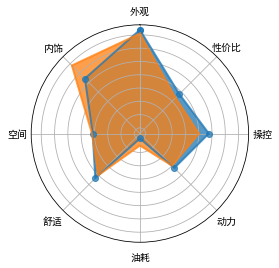

In [17]:
plt.rcParams['font.sans-serif'] = ['SimHei']

name = ['外观', '内饰','空间', '舒适', '油耗', '动力', '操控', '性价比']
theta = np.linspace(0,2*np.pi,len(name),endpoint=False)    #将圆根据标签的个数等比分
lst = []
for i in name:
    lst.append(score[i]*100)
value1 = np.array(lst)
value1 = (value1 - np.mean(value1)) / np.std(value1)
# score.values()
# theta = np.concatenate((theta,[theta[0]]))  #闭合
value1 = np.concatenate((value1,[value1[0]]))  #闭合

lst = []
for i in name:
    lst.append(web_score[i]*50)
value2 = np.array(lst)
value2 = (value2 - np.mean(value2)) / np.std(value2)
# score.values()
theta = np.concatenate((theta,[theta[0]]))  #闭合
value2 = np.concatenate((value2,[value2[0]]))  #闭合

ax = plt.subplot(111,projection = 'polar')      #构建图例
ax.plot(theta,value1,'o-',lw=2,alpha = 0.75,label='Sentiment')    #绘图
ax.fill(theta,value1,'o-',alpha = 0.75)           #填充

ax.plot(theta,value2,lw=2,alpha = 0.75,label='Web')    #绘图
ax.fill(theta,value2,alpha = 0.75)           #填充

ax.set_thetagrids(theta*180/np.pi,name)         #替换标签
# ax.set_ylim(0,110)                          #设置极轴的区间
ax.set_theta_zero_location('N')         #设置极轴方向
# ax.set_title('Sentiment of bad review',fontsize= 10)   #添加图描述
ax.tick_params('y', labelleft=False)
plt.show()